In [1]:
## Inesh Bose

# Assessment 2

This assessment involves reproducing an experimental analysis using an openly available dataset.  The datasets and accompanying research paper can be found at: https://dl.acm.org/citation.cfm?id=3174220

Please follow on below and complete all sections.

See also the accompanying IS AE2 sheet on Moodle for submission details etc.


In [2]:
# You should use pandas to work with the dataset as shown in this notebook.
import pandas as pd
from os import listdir
import numpy as np

# Generate visualisations in matplotlib or seaborn
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# This asessment also depends on the pylev package.  Ensure you have installed this before beginning.

import pylev

# Keystroke Dataset
The dataset you will use for this assessment is a subset of the 136 million keystrokes analysed in the paper.  Each row in the dataset represents a single keystroke (e.g. pressing "a", or a modifier key like "SHIFT"), and contains information such as key press time, key release time (both in milliseconds), the sentence prompted, the actual input, and the key code.  

Each user's data is stored in a separate txt file. Load in the data into a single data frame and familiarise yourself with its structure.

In [3]:
# load in the dataset provided at https://dl.acm.org/citation.cfm?id=3174220 

user_frame = []

for file in listdir('KeyStrokes-LabStudies/'):
    if (file[-3:]) == 'txt':
        user_frame.append(pd.read_csv('KeyStrokes-LabStudies/' + file, sep='\t'))

data_frame = pd.concat(user_frame, axis=0, ignore_index=True)
    

In [4]:
# if in doubt, always check that the data appears as you expect

data_frame.head()

,PARTICIPANT_ID,TEST_SECTION_ID,SENTENCE,USER_INPUT,KEYSTROKE_ID,PRESS_TIME,RELEASE_TIME,LETTER,KEYCODE
0,145007,1577476,"I will be out on Friday, but any other day is ...","I will be out on Frida, but any other day is f...",74993989,1473871859057,1473871859304,SHIFT,16
1,145007,1577476,"I will be out on Friday, but any other day is ...","I will be out on Frida, but any other day is f...",74993987,1473871859201,1473871859297,I,73
2,145007,1577476,"I will be out on Friday, but any other day is ...","I will be out on Frida, but any other day is f...",74993991,1473871859312,1473871859408,,32
3,145007,1577476,"I will be out on Friday, but any other day is ...","I will be out on Frida, but any other day is f...",74993993,1473871859424,1473871859520,w,87
4,145007,1577476,"I will be out on Friday, but any other day is ...","I will be out on Frida, but any other day is f...",74993995,1473871859504,1473871859568,i,73


In [5]:
# setup a new data structure to hold each of the metrics you have calculated

# All metrics should be calculated on a per-sentence basis.  Use a data frame to store the metrics you calculate.

metric_frame = data_frame[['PARTICIPANT_ID', 'TEST_SECTION_ID']].drop_duplicates().reset_index(drop=True)

metric_frame.head()


,PARTICIPANT_ID,TEST_SECTION_ID
0,145007,1577476
1,145007,1577488
2,145007,1577500
3,145007,1577508
4,145007,1577517


# 1. Performance Metrics

Keystroke studies have a number of standard performance metrics. For this assessment, you must calculate each of the metrics below and generate an accompanying diagram/visualisation for each.  All metrics should be calculated for each test section (on a sentence by sentence basis) but visualisations can be produced using any grouping of the data.

__For each metric below__, you should use the following pattern to implement your solution. 
* Define a function that:
 * takes in a data frame holding data for a single sentence (i.e. all data for unique TEST_SECTION_ID), where each row of the data frame is a keystroke for that sentence 
 * returns the metric for that sentence
* Call the add_column function below to add the metric to the metric_frame as a new column.  add_column takes in a data frame (to which we're adding a column), your new function to calculate the metric, and a name for the new column.

In [6]:
def add_column(frame, fn, name):
    new_col = data_frame.groupby(['TEST_SECTION_ID', 'PARTICIPANT_ID']).apply(fn).reset_index(name=name)
    return frame.merge(new_col)

To illustrate the format, the first metric below is completed for you

## a) Uncorrected Error Rate
UER is the Levenshtein distance (use the pylev package to calculate this) from the correct string to the string entered by the user, divided by the number of characters in whichever is larger of the correct or entered string.

Calculate the Levenshtein distance for each test section (sentence), print the average value across all users, and produce a visualisation of this data.

__Sample solution provided__  

  -- Use this sample answer to structure your solutions for the remaining metrics.

In [7]:
def uncorrErrRate(test_section):
    dist = pylev.levenshtein(test_section['SENTENCE'].iloc[0], test_section['USER_INPUT'].iloc[0])
    maxChars = max(len(test_section['SENTENCE'].iloc[0]), len(test_section['USER_INPUT'].iloc[0]))
    return 100.0*float(dist)/float(maxChars)

metric_frame = add_column(metric_frame, uncorrErrRate, 'UER')

uer_mean = metric_frame['UER'].mean()
print(f"Average Uncorrected Error Rate: {uer_mean:.6f}")

Average Uncorrected Error Rate: 2.394441


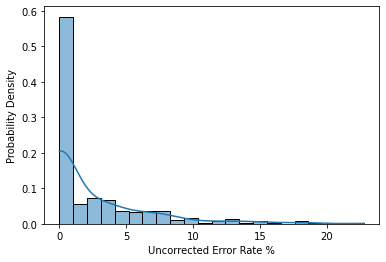

In [8]:
#show probability
ax = sns.histplot(data=metric_frame['UER'], kde="true", stat="probability")
ax.set(xlabel="Uncorrected Error Rate %", ylabel="Probability Density");


## b) Words Per Minute
WPM is calculated by taking the word count of the typed string divided by the time in minutes from the first key press to the last key press. 

__NOTE__ the definition of 'word' in the paper for the purposes of these calculations: a word is considered as any 5 characters of text the user submits (including spaces, punctuation etc.)

Calculate the WPM for each test section, print the average value across all users, and produce a visualisation of this data.

__2 marks__

Average Words Per Minute: 53.816667


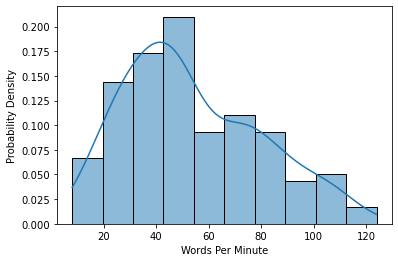

In [9]:
def wordsPerMin(test_section):
    count = len(test_section['USER_INPUT'].iloc[0])/5
    time = (test_section['RELEASE_TIME'].iloc[-1] - test_section['PRESS_TIME'].iloc[0])/60000
    return int(count/time)

metric_frame = add_column(metric_frame, wordsPerMin, 'WPM')

wpm_mean = metric_frame['WPM'].mean()
print(f"Average Words Per Minute: {wpm_mean:.6f}")

bx = sns.histplot(data=metric_frame['WPM'], kde="true", stat="probability")
bx.set(xlabel="Words Per Minute", ylabel="Probability Density");

## c) Error Corrections
EC is calculated as the percentage of keypresses that are the backspace or delete key.

Calculate the EC for each test section, print the average across all users, and produce a visualisation of this data.

__2 marks__

Average Error Corrections: 3.874127


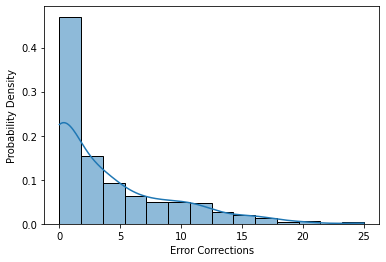

In [10]:
def errorCorrections(test_section):
    keypresses = len(test_section)
    count = list(test_section['LETTER']).count("BKSP") + list(test_section['LETTER']).count("DELETE")
    return 100*(count/keypresses)

metric_frame = add_column(metric_frame, errorCorrections, 'EC')

ec_mean = metric_frame['EC'].mean()
print(f"Average Error Corrections: {ec_mean:.6f}")

cx = sns.histplot(data=metric_frame['EC'], kde="true", stat="probability")
cx.set(xlabel="Error Corrections", ylabel="Probability Density");

## d) Keystrokes Per Character
KPC is the number of total keystrokes divided by the number of characters in the final sentence. 

Calculate the KPC for each test section, print the average across all users, and produce a visualisation of this data.

__2 marks__

Average Keystrokes Per Character: 1.154218


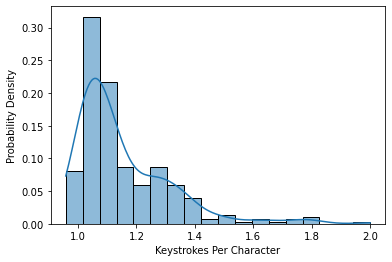

In [11]:
def keyPerChar(test_section):
    return len(test_section)/len(test_section['USER_INPUT'].iloc[0])

metric_frame = add_column(metric_frame, keyPerChar, 'KPC')

kpc_mean = metric_frame['KPC'].mean()
print(f"Average Keystrokes Per Character: {kpc_mean:.6f}")

dx = sns.histplot(data=metric_frame['KPC'], kde="true", stat="probability")
dx.set(xlabel="Keystrokes Per Character", ylabel="Probability Density");

## e) Interkey Interval
IKI is the time difference in milliseconds between two keypress events.  Remove IKI intervals of greater than 5000 milliseconds from your analysis.

Calculate the average IKI for each test section, print the average across all users, and produce a visualisation of this data.

__2 marks__

Average Interkey Interval (using only Press Time): 236.195073
Average Interkey Interval: 117.963677


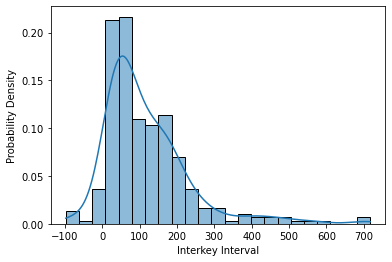

In [12]:
def interkeyIntervalPT(test_section):
    entries = len(test_section)
    sum_diff = sum([
        time_diff for time_diff in [
            test_section['PRESS_TIME'].iloc[i] - test_section['PRESS_TIME'].iloc[i-1]
            for i in range(1, entries)
        ] if time_diff<=5000
    ])
    return sum_diff/entries

def interkeyInterval(test_section):
    entries = len(test_section)
    sum_diff = sum([
        time_diff for time_diff in [
            test_section['PRESS_TIME'].iloc[i] - test_section['RELEASE_TIME'].iloc[i-1]
            for i in range(1, entries)
        ] if time_diff<=5000
    ])
    return sum_diff/entries

metric_frame = add_column(metric_frame, interkeyIntervalPT, 'IKI_PT')
metric_frame = add_column(metric_frame, interkeyInterval, 'IKI')

iki_pt_mean = metric_frame['IKI_PT'].mean()
iki_mean = metric_frame['IKI'].mean()
print(f"Average Interkey Interval (using only Press Time): {iki_pt_mean:.6f}")
print(f"Average Interkey Interval: {iki_mean:.6f}")

ex = sns.histplot(data=metric_frame['IKI'], kde="true", stat="probability")
ex.set(xlabel="Interkey Interval", ylabel="Probability Density");

## f) Keypress Duration
KPD is the duration in milliseconds between a keypress down and keypress up event.

Calculate the average KPD for each test section, print the average across all users, and produce a visualisation of this data.

__2 marks__

Average Keypress Duration: -127.675477


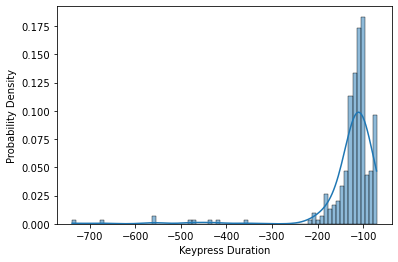

In [13]:
def keypressDur(test_section):
    entries = len(test_section)
    return sum([
        test_section['PRESS_TIME'].iloc[i] - test_section['RELEASE_TIME'].iloc[i]
        for i in range(entries)
    ])/entries

metric_frame = add_column(metric_frame, keypressDur, 'KPD')

kpd_mean = metric_frame['KPD'].mean()
print(f"Average Keypress Duration: {kpd_mean:.6f}")

fx = sns.histplot(data=metric_frame['KPD'], kde="true", stat="probability")
fx.set(xlabel="Keypress Duration", ylabel="Probability Density");

# 2. Key Grouping Analysis
There are certain key combinations and orderings in typing behaviour that can be seen in a dataset like this. In the paper, the authors describe some of these results such as lettering pairings "as" "an" and "ll" which require typing across different areas of a QWERTY keyboard.

Using your knowledge of keyboard layouts and typing behaviour, complete a novel analysis of a key grouping of your choice. You may need to be creative in exploring the data to find and analyse a typing behaviour.

Use the space below to describe what key grouping you are analysing and why (up to 200 words). Generate suitable visualisations to illustrate your point and give a summary of your results (up to 200 words). Comment on whether your results complement or contradict any other findings or discussions in the paper or are investigating something new, and/or general implications of your findings (up to 200 words).

__10 marks__

In [14]:
pair_str = "en"
pairing = [c for c in pair_str]


In [15]:
from IPython.display import display, Markdown

part_a = \
f"""
### Pairing
For this analysis, **I chose "{pair_str}"** since they're the closest keys for an hand alternation bigram,
so I'm interested in knowing how frequently would the hands be alternating since they got a high enough
alternation IKI (average of bigram IKIs typed with fingers of different hands) to be categorised as such
in the How-we-Type dataset from Feit _et al_. (2016). It could be interesting to see how one would use the
two letters. The awkward positioning of letters with a person's hands may be confusing to an evaluator
causing them to think that both letters ("e" and "n") would use the index fingers of each hand respectively,
but there's a very high chance that this is not the case. I expected to use the index & middle left fingers
for "e" and index & thumb for "n", however, while typing this as well, I found myself to be using my ring
finger for "e" as well. "n" was limited just to my index and thumb.
"""

display(Markdown(part_a))
print(len(part_a.split()), "words")


### Pairing
For this analysis, **I chose "en"** since they're the closest keys for an hand alternation bigram,
so I'm interested in knowing how frequently would the hands be alternating since they got a high enough
alternation IKI (average of bigram IKIs typed with fingers of different hands) to be categorised as such
in the How-we-Type dataset from Feit _et al_. (2016). It could be interesting to see how one would use the
two letters. The awkward positioning of letters with a person's hands may be confusing to an evaluator
causing them to think that both letters ("e" and "n") would use the index fingers of each hand respectively,
but there's a very high chance that this is not the case. I expected to use the index & middle left fingers
for "e" and index & thumb for "n", however, while typing this as well, I found myself to be using my ring
finger for "e" as well. "n" was limited just to my index and thumb.


167 words


Average Interkey Interval (Letter Pairing): 68.470000


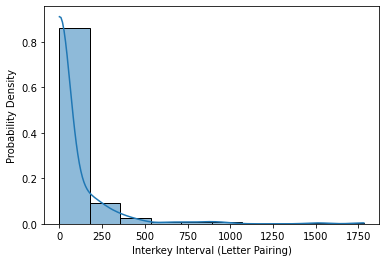

In [16]:
def repInterkeyInterval(test_section):
    entries = len(test_section)
    time_diff = []
    for i in range(1, entries):
        letter_1 = test_section['LETTER'].iloc[i-1]
        letter_2 = test_section['LETTER'].iloc[i]
        if [letter_1, letter_2] == pairing:
            diff = test_section['PRESS_TIME'].iloc[i] - test_section['PRESS_TIME'].iloc[i-1]
            if diff <= 5000:
                time_diff.append(diff)
    return sum(time_diff)


metric_frame = add_column(metric_frame, repInterkeyInterval, 'LP_IKI')
lp_iki_mean = metric_frame['LP_IKI'].mean()
print(f"Average Interkey Interval (Letter Pairing): {lp_iki_mean:.6f}")


lp1x = sns.histplot(data=metric_frame['LP_IKI'], kde="true", stat="probability")
lp1x.set(xlabel="Interkey Interval (Letter Pairing)", ylabel="Probability Density");

Average Rollover Ratio (Letter Pairing): 2.333333


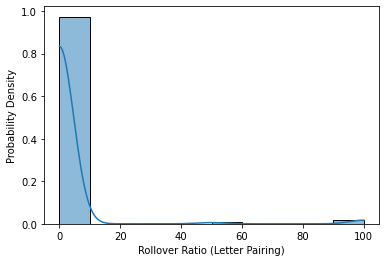

In [17]:
def rolloverRatio(test_section):
    entries = len(test_section)
    total_count = 0
    rollover_count = 0
    for i in range(1, entries):
        letter_1 = test_section['LETTER'].iloc[i-1]
        letter_2 = test_section['LETTER'].iloc[i]
        if [letter_1, letter_2] == pairing:
            total_count+=1
            if test_section['RELEASE_TIME'].iloc[i-1] > test_section['PRESS_TIME'].iloc[i]:
                rollover_count+=1
    return 100*(rollover_count/total_count) if total_count > 0 else 0

metric_frame = add_column(metric_frame, rolloverRatio, 'LP_RR')

lp_rr_mean = metric_frame['LP_RR'].mean()
print(f"Average Rollover Ratio (Letter Pairing): {lp_rr_mean:.6f}")


lp2x = sns.histplot(data=metric_frame['LP_RR'], kde="true", stat="probability")
lp2x.set(xlabel="Rollover Ratio (Letter Pairing)", ylabel="Probability Density");

In [18]:
part_b = \
f"""
### Visualisations
The **Interkey Interval** graph is a necessity for bigrams. We see that the average interkey interval for
letter pair "{pair_str}" ({lp_iki_mean:.6f}) is clearly {"less" if lp_iki_mean <= iki_mean else "more"}
than the average interkey interval for all ({iki_mean:.6f}) by {(lp_iki_mean/iki_mean)*100:.2f}%. This
obviously means that it's a justified bigram. Unfortunately, though, it would not be possible to confirm
that "{pair_str}" lies under hand alternation category because of lack of data provided. **However**, there
is another analytic _may_ help us in understanding the hand alternation.

The **Rollover Ratio** graph reveals typing of consecutive keys (a biagram) without releasing the earlier
key. We can understand that usually, in a case of a rollover, two different hands are involved as it is
unlikely that a person would press two keys at the same time with one hand - specially those that are in
different regions of a keyboard. The rollover ratio here is calculated by dividing number of rollover
"{pair_str}" by total number of "{pair_str}" which turns out to be {lp_rr_mean:.6f}.
"""

display(Markdown(part_b))
print(len(part_b.split()), "words")


### Visualisations
The **Interkey Interval** graph is a necessity for bigrams. We see that the average interkey interval for
letter pair "en" (68.470000) is clearly less
than the average interkey interval for all (117.963677) by 58.04%. This
obviously means that it's a justified bigram. Unfortunately, though, it would not be possible to confirm
that "en" lies under hand alternation category because of lack of data provided. **However**, there
is another analytic _may_ help us in understanding the hand alternation.

The **Rollover Ratio** graph reveals typing of consecutive keys (a biagram) without releasing the earlier
key. We can understand that usually, in a case of a rollover, two different hands are involved as it is
unlikely that a person would press two keys at the same time with one hand - specially those that are in
different regions of a keyboard. The rollover ratio here is calculated by dividing number of rollover
"en" by total number of "en" which turns out to be 2.333333.


163 words


In [19]:
part_c = \
f"""
### Summary
Our analysis was done using a subset of the 168 participants' data (300 participants), with 13928
keystrokes where 84 **pairs** (168 keystrokes) are the chosen bigram "{pair_str}". The data will not
be 100% accurate and / or suggestive.

Since the interkey interval for "{pair_str}" is less than {iki_mean:.6f} (average interkey interval), so
this means it is on the good side. It is near the lower bound of 60ms as found in Feit _et al_. (2016)
The rollover ratio appears to be a little confusing here though. Out of the 84 keystroke pairs where
{pair_str} is pressed, only one has a case of rollover (the second key pressed before releasing the
first key), so it is very difficult to confirm if the bigram is indeed under the hand alternation
category. The thing is that the letters {" and ".join(pairing)} - being the nearest in the hand
alternation category - are accessible and can actually be pressed with one hand. For example, left pinky
and left thumb can be placed on "e" and "n" respectively; specially for people with longer keyboards
(like with a numpad). Still, even a split keyboard layout has the two in separate places (even though
all participants here have the standard QWERTY keyboard).
"""

display(Markdown(part_c))
print(len(part_c.split()), "words")


### Summary
Our analysis was done using a subset of the 168 participants' data (300 participants), with 13928
keystrokes where 84 **pairs** (168 keystrokes) are the chosen bigram "en". The data will not
be 100% accurate and / or suggestive.

Since the interkey interval for "en" is less than 117.963677 (average interkey interval), so
this means it is on the good side. It is near the lower bound of 60ms as found in Feit _et al_. (2016)
The rollover ratio appears to be a little confusing here though. Out of the 84 keystroke pairs where
en is pressed, only one has a case of rollover (the second key pressed before releasing the
first key), so it is very difficult to confirm if the bigram is indeed under the hand alternation
category. The thing is that the letters e and n - being the nearest in the hand
alternation category - are accessible and can actually be pressed with one hand. For example, left pinky
and left thumb can be placed on "e" and "n" respectively; specially for people with longer keyboards
(like with a numpad). Still, even a split keyboard layout has the two in separate places (even though
all participants here have the standard QWERTY keyboard).


207 words
